# <span style=color:darkblue>06 projecte datascience-k-means</span>

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import Axes3D

#Normalització
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#Train test
from sklearn.model_selection import train_test_split

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#metriques
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Regresion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#PCA
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

## <span style=color:darkblue>DataFrame Types rendiment</span>

In [187]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_attributs_all.csv')

In [188]:
df = df.drop(['Unnamed: 0'], axis=1)

In [189]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,idpunks,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,...,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634,2019.979831,5.019165,15.959690,5506.306785,...,0.004619,0.001521,0.003414,0.011390,0.008062,0.008119,0.002037,0.002668,0.015608,0.003472
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095,1.329693,3.125331,8.375266,2652.762722,...,0.067808,0.038966,0.058332,0.106116,0.089427,0.089742,0.045088,0.051586,0.123953,0.058818
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000,2019.000000,2.000000,9.000000,3258.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673,2021.000000,4.000000,16.000000,5565.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408,2021.000000,7.000000,23.000000,7819.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000,31.000000,9998.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
df

,id,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,0.094547,60.00,614.843,2,7.171077,2020,11,30,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,0.094547,60.00,614.843,2,7.171077,2020,11,30,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,0.094547,31.00,165.947,1,44.917140,2019,4,6,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,0.094547,31.00,165.947,1,44.917140,2019,4,6,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,0.094547,0.42,272.692,0,0.000000,2017,6,26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,38.00,1575.850,1,5.848119,2021,3,3,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,0.054166,38.00,1575.850,1,5.848119,2021,3,3,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,0.054166,15.00,682.642,0,0.000000,2020,12,27,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,0.054166,15.00,682.642,0,0.000000,2020,12,27,...,0,0,0,0,0,0,0,0,0,0


### <span style=color:darkred>labelencoder</span>

In [191]:
labelencoder = LabelEncoder()

In [192]:
df['type_le'] = labelencoder.fit_transform(df['type_x'])

In [193]:
#Reorganizar columans DataFrame
df = df[['id',
 'type_x',
 'type_le',
'Redimiento',
 'rarity',
 'adj_close',
 'Num_venta',
 'amount_eth',
 '3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Blonde Short',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Blue',
 'Clown Eyes Green',
 'Clown Hair Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Dark Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Front Beard Dark',
 'Frown',
 'Frumpy Hair',
 'Goat',
 'Gold Chain',
 'Green Eye Shadow',
 'Half Shaved',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mohawk Dark',
 'Mohawk Thin',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Normal Beard Black',
 'Orange Side',
 'Peak Spike',
 'Pigtails',
 'Pilot Helmet',
 'Pink With Hat',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Hair',
 'Purple Lipstick',
 'Red Mohawk',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Shaved Head',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Straight Hair Blonde',
 'Straight Hair Dark',
 'Stringy Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Welding Goggles',
 'Wild Blonde',
 'Wild Hair',
 'Wild White Hair']]

In [194]:
df_definitivo = pd.DataFrame(df.iloc[ : , 0:8])
df_definitivo

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,1,Male,3,7.171077,0.094547,614.843,2,60.00
1,1,Male,3,7.171077,0.094547,614.843,2,60.00
2,1,Male,3,44.917140,0.094547,165.947,1,31.00
3,1,Male,3,44.917140,0.094547,165.947,1,31.00
4,1,Male,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00


### <span style=color:darkred>Normalitzar les dades</span>

In [195]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
df_scaler = pd.DataFrame(df)
df_scaler

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_scaler = df_scaler.iloc[ : , 2:8]

In [198]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [199]:
scalerN = Normalizer()

In [200]:
df_scaler.iloc[ : , 0:8]

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [201]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:8]= scalerN.fit_transform(df_scaler.iloc[ : , 0:8])

In [202]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540
...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968


### <span style=color:darkred>Cantidad de Clusters</span>

In [203]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

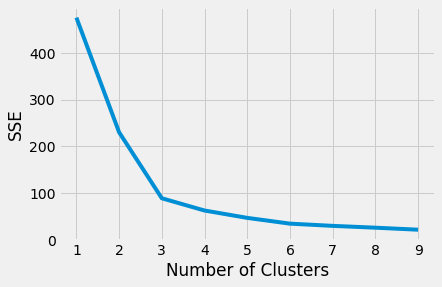

In [204]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [205]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

3

### <span style=color:darkred>Cantidad de Clusters</span>

In [206]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=3)

In [207]:
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [208]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_types']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_type_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540,0
...,...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [209]:
pca = PCA(n_components=2)

In [210]:
pca_df = pca.fit_transform (df_scaler)

In [211]:
pca_df

array([[-0.0563282 ,  0.05135764],
       [-0.0563282 ,  0.05135764],
       [ 1.95342967, -0.01620492],
       ...,
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679]])

In [212]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.056328,0.051358
1,-0.056328,0.051358
2,1.953430,-0.016205
3,1.953430,-0.016205
4,-0.061591,-0.005028
...,...,...
34850,-0.060363,0.004784
34851,-0.060363,0.004784
34852,-0.061080,0.004427
34853,-0.061080,0.004427


In [213]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment.csv')

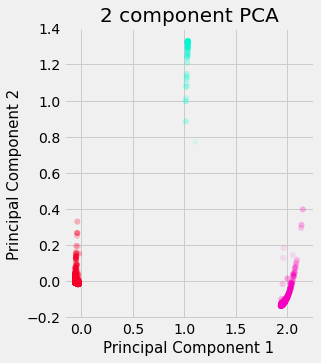

In [214]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [215]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.982

In [216]:
# Instantiate k-means and dbscan algorithms
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features

dbscan.fit(df_scaler)

# Compute the silhouette scores for each algorithm
dbscan_silhouette = silhouette_score(df_scaler, dbscan.labels_).round (2)

#kmeans_silhoutte = silhouette_score(x, y)

In [217]:
dbscan_silhouette

0.98

In [218]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,1,0
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style=color:darkblue>DataFrame Attributes rendiment</span>

In [219]:
df = pd.read_csv('.\\datasets_definitius\\df_rend_traits.csv')

In [220]:
df = df.drop(['Unnamed: 0'], axis=1)

In [221]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196


In [222]:
df_definitivo['idaccesori'] = df['accesories2']

In [223]:
df

,id,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,accesories2
0,1,Male,0.094547,60.00,614.843,2,7.171077,Smile
1,1,Male,0.094547,60.00,614.843,2,7.171077,Mohawk
2,1,Male,0.094547,31.00,165.947,1,44.917140,Smile
3,1,Male,0.094547,31.00,165.947,1,44.917140,Mohawk
4,1,Male,0.094547,0.42,272.692,0,0.000000,Smile
...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,38.00,1575.850,1,5.848119,Black Lipstick
34851,9998,Female,0.054166,38.00,1575.850,1,5.848119,Clown Eyes Green
34852,9998,Female,0.054166,15.00,682.642,0,0.000000,Wild White Hair
34853,9998,Female,0.054166,15.00,682.642,0,0.000000,Black Lipstick


### <span style=color:darkred>labelencoder</span>

In [224]:
labelencoder = LabelEncoder()

In [225]:
#df['type_le'] = labelencoder.fit_transform(df['type_x'])
df['accesories_le'] = labelencoder.fit_transform(df['accesories2'])

In [226]:
columans = list(df.columns)

In [227]:
df = df[[
 'accesories_le',
 'Num_venta',
 'rarity',
 'amount_eth',
 'adj_close',
 'Redimiento']]

In [228]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


### <span style=color:darkred>Normalitzar les dades</span>

In [229]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [230]:
#df = df.drop(['Year','Month','YearMonth','type_x','type_y','idpunks','accesories2','Unnamed: 14'],axis=1)

In [231]:
df_scaler = pd.DataFrame(df)
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [232]:
df_scaler.iloc[ : , 0:7]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [233]:
scalerN = Normalizer()

In [234]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:7]= scalerN.fit_transform(df_scaler.iloc[ : , 0:7])

In [235]:
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [236]:
df_scaler.iloc[ : , 0:6]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [237]:
X = np.array(df_scaler.iloc[ : , 0:6])
X

array([[1.14170879e-01, 3.21608110e-03, 1.52035249e-04, 9.64824330e-02,
        9.88692476e-01, 1.15313821e-02],
       [7.26456520e-02, 3.22869565e-03, 1.52631582e-04, 9.68608694e-02,
        9.92570459e-01, 1.15766120e-02],
       [3.76516308e-01, 5.30304660e-03, 5.01386616e-04, 1.64394444e-01,
        8.80024673e-01, 2.38197684e-01],
       ...,
       [1.24963428e-01, 0.00000000e+00, 7.87073430e-05, 2.17959467e-02,
        9.91921908e-01, 0.00000000e+00],
       [7.32251945e-03, 0.00000000e+00, 7.93270500e-05, 2.19675583e-02,
        9.99731864e-01, 0.00000000e+00],
       [2.48895207e-02, 0.00000000e+00, 7.93046012e-05, 2.19613418e-02,
        9.99448951e-01, 0.00000000e+00]])

### <span style=color:darkred>Cantidad de Clusters</span>

In [238]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

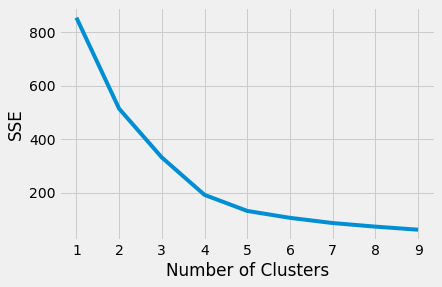

In [239]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [240]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

4

### <span style=color:darkred>Cantidad de Clusters</span>

In [241]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=4)

In [242]:
clustering.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [243]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_attiributes']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_Attri_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento,Kmeans_Clustering
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531,0
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577,0
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198,1
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991,1
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000,1
...,...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710,0
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710,0
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000,0
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [244]:
pca = PCA(n_components=2)

In [245]:
pca_df = pca.fit_transform (df_scaler)

In [246]:
pca_df

array([[-0.28312565,  0.04896721],
       [-0.28738023,  0.01099512],
       [ 0.75606085,  0.16330379],
       ...,
       [-0.2833762 ,  0.05854527],
       [-0.29527495, -0.04801031],
       [-0.2935446 , -0.03237886]])

In [247]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.283126,0.048967
1,-0.287380,0.010995
2,0.756061,0.163304
3,0.742362,0.034928
4,0.721403,0.097626
...,...,...
34850,-0.295401,-0.052805
34851,-0.294655,-0.046054
34852,-0.283376,0.058545
34853,-0.295275,-0.048010


In [248]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment_traits.csv')

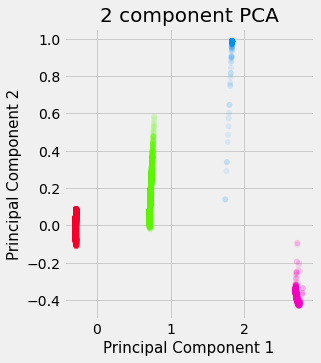

In [249]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

In [ ]:
centroids = kmeans.cluster_centers_
colors = ['r','b','y','g','c','m']
plt.figure(figsize=(10, 7))
plt.scatter(pca_df_df['componente1'], pca_df_df['componente1'], color=[colors[l] for l_ in labels], label=labels, s=2) 
plt.scatter(centroids[:, 0],centroids[:, 1], color=[c for c in colors[:len(centroids)]], marker = "x", s=150, linewidths = 5, zorder = 10)

### <span style=color:darkred>Evaulació</span>

In [250]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.9347

In [251]:
dbscan = DBSCAN(eps=0.3)

dbscan.fit(df_scaler)

dbscan_silhouette = silhouette_score(df_scaler, dbscan.labels_).round (2)

#kmeans_silhoutte = silhouette_score(x, y)

In [252]:
dbscan_silhouette

0.93

In [362]:
df_definitivo

,id,Redimiento,type_x,type_le,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,Kmeans_Clustering_attiributes,idaccesori
0,1,7.171077,Male,3,0.094547,614.843,2,60.00,0,0,Smile
1,1,7.171077,Male,3,0.094547,614.843,2,60.00,0,0,Mohawk
2,1,44.917140,Male,3,0.094547,165.947,1,31.00,2,1,Smile
3,1,44.917140,Male,3,0.094547,165.947,1,31.00,2,1,Mohawk
4,1,0.000000,Male,3,0.094547,272.692,0,0.42,0,1,Smile
...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,5.848119,Female,2,0.054166,1575.850,1,38.00,0,0,Black Lipstick
34851,9998,5.848119,Female,2,0.054166,1575.850,1,38.00,0,0,Clown Eyes Green
34852,9998,0.000000,Female,2,0.054166,682.642,0,15.00,0,0,Wild White Hair
34853,9998,0.000000,Female,2,0.054166,682.642,0,15.00,0,0,Black Lipstick


## <span style=color:darkblue>Regression Model</span>

__Ordenar el dataframe por rendiment__

In [363]:
#df_definitivo2= pd.DataFrame( df_definitivo[df-df_definitivo['Kmeans_Clustering_types']==2])
order_by_rendiment = df_definitivo.sort_values('Redimiento')

In [364]:
order_by_rendiment

,id,Redimiento,type_x,type_le,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,Kmeans_Clustering_attiributes,idaccesori
17427,5565,0.000000,Female,2,0.107543,365.57,0,1.2,0,0,Green Eye Shadow
19008,5999,0.000000,Male,3,0.149592,2367.66,0,14.5,0,0,Mole
19007,5999,0.000000,Male,3,0.149592,2367.66,0,14.5,0,0,Small Shades
19006,5999,0.000000,Male,3,0.149592,2367.66,0,14.5,0,0,Mohawk
19005,5997,0.000000,Male,3,0.149525,3715.15,0,14.5,0,0,Mole
...,...,...,...,...,...,...,...,...,...,...,...
21172,6552,8447.378898,Male,3,0.056414,2157.66,1,59.0,2,3,Cowboy Hat
21171,6552,8447.378898,Male,3,0.056414,2157.66,1,59.0,2,3,Smile
5232,2424,25195.513196,Zombie,4,0.008871,2643.59,1,325.0,2,3,Bandana
5234,2424,25195.513196,Zombie,4,0.008871,2643.59,1,325.0,2,3,Earring


___Correlació___

In [365]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [366]:
corr_matrix = df_definitivo.select_dtypes(include=['float64', 'int']).corr()
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
34,Kmeans_Clustering_attiributes,Kmeans_Clustering_types,0.758316,0.758316
29,Kmeans_Clustering_types,Kmeans_Clustering_attiributes,0.758316,0.758316
4,Redimiento,Kmeans_Clustering_types,0.515225,0.515225
24,Kmeans_Clustering_types,Redimiento,0.515225,0.515225
5,Redimiento,Kmeans_Clustering_attiributes,0.381594,0.381594
30,Kmeans_Clustering_attiributes,Redimiento,0.381594,0.381594
17,adj_close,Kmeans_Clustering_attiributes,-0.231648,0.231648
32,Kmeans_Clustering_attiributes,adj_close,-0.231648,0.231648
20,amount_eth,adj_close,0.228992,0.228992
15,adj_close,amount_eth,0.228992,0.228992


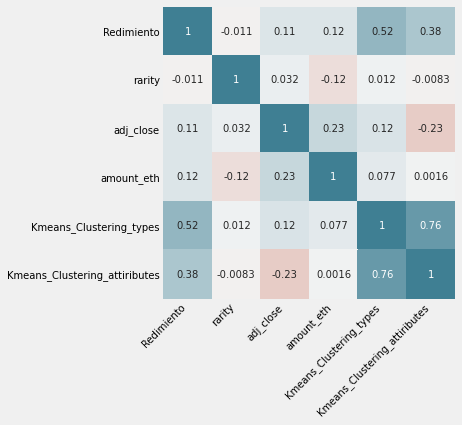

In [367]:
ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [368]:
df_definitivo = df_definitivo[['id', 'Redimiento','type_x', 'type_le', 'rarity', 'adj_close','Num_venta', 'amount_eth', 'Kmeans_Clustering_types', 
       'Kmeans_Clustering_attiributes','idaccesori']]

df_definitivo

,id,Redimiento,type_x,type_le,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,Kmeans_Clustering_attiributes,idaccesori
0,1,7.171077,Male,3,0.094547,614.843,2,60.00,0,0,Smile
1,1,7.171077,Male,3,0.094547,614.843,2,60.00,0,0,Mohawk
2,1,44.917140,Male,3,0.094547,165.947,1,31.00,2,1,Smile
3,1,44.917140,Male,3,0.094547,165.947,1,31.00,2,1,Mohawk
4,1,0.000000,Male,3,0.094547,272.692,0,0.42,0,1,Smile
...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,5.848119,Female,2,0.054166,1575.850,1,38.00,0,0,Black Lipstick
34851,9998,5.848119,Female,2,0.054166,1575.850,1,38.00,0,0,Clown Eyes Green
34852,9998,0.000000,Female,2,0.054166,682.642,0,15.00,0,0,Wild White Hair
34853,9998,0.000000,Female,2,0.054166,682.642,0,15.00,0,0,Black Lipstick


### <span style=color:darkred>Variable resposta</span>

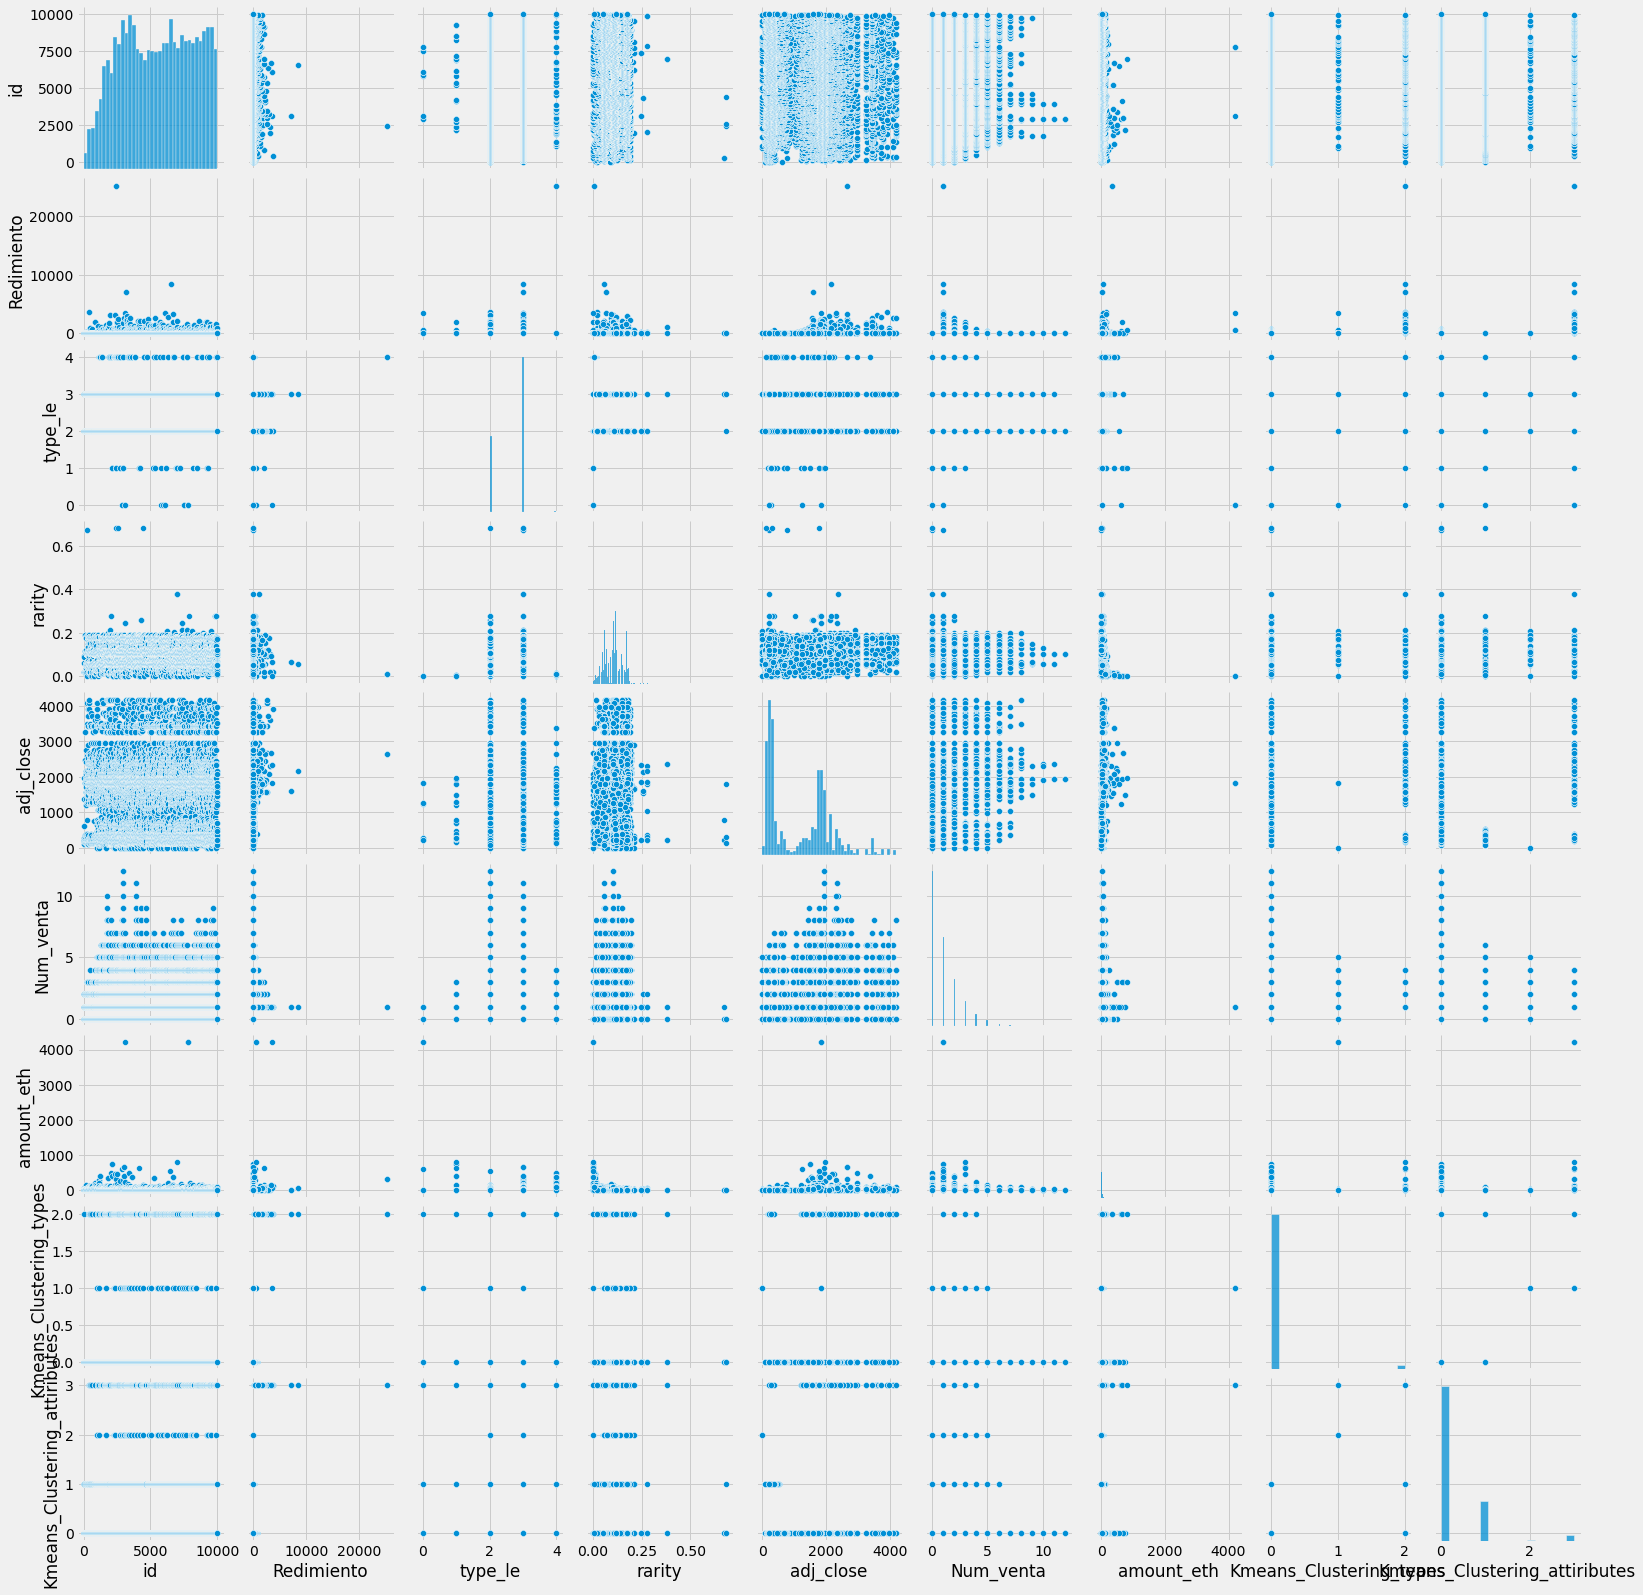

In [384]:
sns.pairplot(df_definitivo)

<AxesSubplot:xlabel='id', ylabel='Redimiento'>

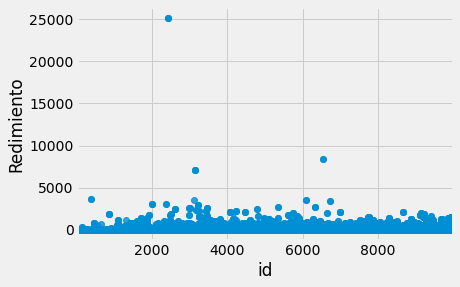

In [387]:
sns.regplot(x='id',y='Redimiento',data= df_definitivo)

<AxesSubplot:xlabel='rarity', ylabel='Redimiento'>

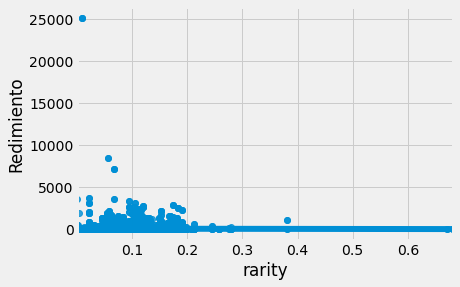

In [389]:
sns.regplot(x='rarity',y='Redimiento',data= df_definitivo)

<AxesSubplot:xlabel='Num_venta', ylabel='Redimiento'>

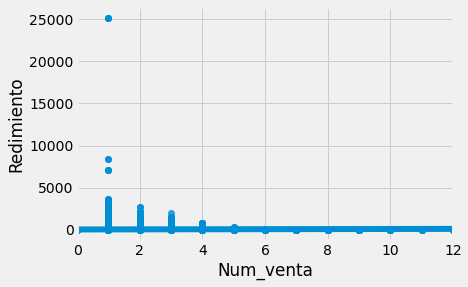

In [383]:
sns.regplot(x='Num_venta',y='Redimiento',data= df_definitivo)

<AxesSubplot:xlabel='Kmeans_Clustering_types', ylabel='Kmeans_Clustering_attiributes'>

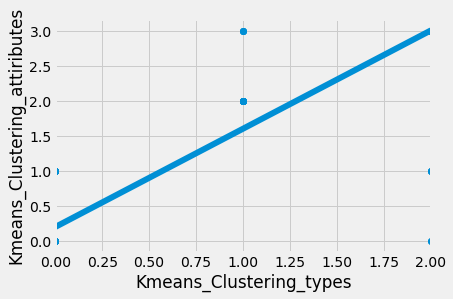

In [370]:
sns.regplot(x='Kmeans_Clustering_types',y='Kmeans_Clustering_attiributes',data= df_definitivo)

### <span style=color:darkred>Train/test</span>

In [371]:
df_definitivo['type_le'] = df_definitivo['type_le'].astype('int64')

In [372]:
df_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             34855 non-null  int64  
 1   Redimiento                     34855 non-null  float64
 2   type_x                         34855 non-null  object 
 3   type_le                        34855 non-null  int64  
 4   rarity                         34855 non-null  float64
 5   adj_close                      34855 non-null  float64
 6   Num_venta                      34855 non-null  int64  
 7   amount_eth                     34855 non-null  float64
 8   Kmeans_Clustering_types        34855 non-null  int32  
 9   Kmeans_Clustering_attiributes  34855 non-null  int32  
 10  idaccesori                     34844 non-null  object 
dtypes: float64(4), int32(2), int64(3), object(2)
memory usage: 2.7+ MB


In [390]:
y = np.array(df_definitivo.Redimiento).reshape(-1,1)
X = np.array(df_definitivo.select_dtypes(include=['float64','int64']).drop(['Redimiento'],axis=1))

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
    random_state=4 ) 

In [392]:
scaler = Normalizer()

In [393]:
X_train= scalerN.fit_transform(X_train)

In [394]:
#y_train= scalerN.fit_transform(y_train)

### <span style=color:darkred>modelsRegressio</span>

In [395]:
models=[LinearRegression(), Ridge(), Lasso(),DecisionTreeRegressor(),RandomForestRegressor(random_state=32)]

for model in models:
    model.fit(X_train,y_train)
    prediccions = model.predict(X_test)
    print(type(model).__name__)
    print("   MAE", mean_absolute_error(y_test,prediccions))
    print("   RMSE", (mean_squared_error(y_test,prediccions)))
    print( "  R2", r2_score(y_test,prediccions))

LinearRegression
   MAE 1854355.1090935955
   RMSE 4098138361590.247
  R2 -18468410.624444745
Ridge
   MAE 1919540.249649455
   RMSE 4350460166126.9673
  R2 -19605508.139668357
Lasso
   MAE 86681.51575366996
   RMSE 12603951183.355497
  R2 -56799.17071417043
DecisionTreeRegressor
   MAE 48.30439824485488
   RMSE 230561.03449703555
  R2 -0.03903180272242923
RandomForestRegressor
   MAE 641.6395251534418
   RMSE 690147.4091202519
  R2 -2.1101747448641377


<AxesSubplot:>

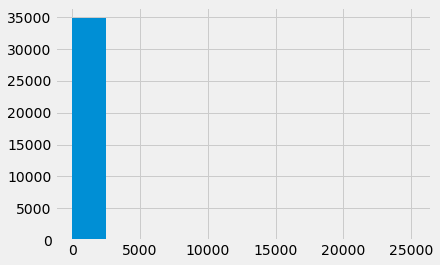

In [396]:
df_definitivo.Redimiento.hist()